# Credit Ease





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_original =  pd.read_csv("/Users/ekamsinghahuja/Desktop/catch/credit_risk_dataset.csv") 
data = pd.read_csv("/Users/ekamsinghahuja/Desktop/catch/credit_risk_dataset.csv") 

In [2]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# Dealing with Null Values

In [5]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
# drop values that are null
data.dropna(axis=0,inplace=True)

In [7]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [8]:
data['loan_status'].value_counts()

0    22435
1     6203
Name: loan_status, dtype: int64

# Dealing with Outliers


In [9]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
#person_age max 144 (issue)
#person_emp_length max 123 (issue)
data.reset_index(inplace = True)

<BarContainer object of 57 artists>

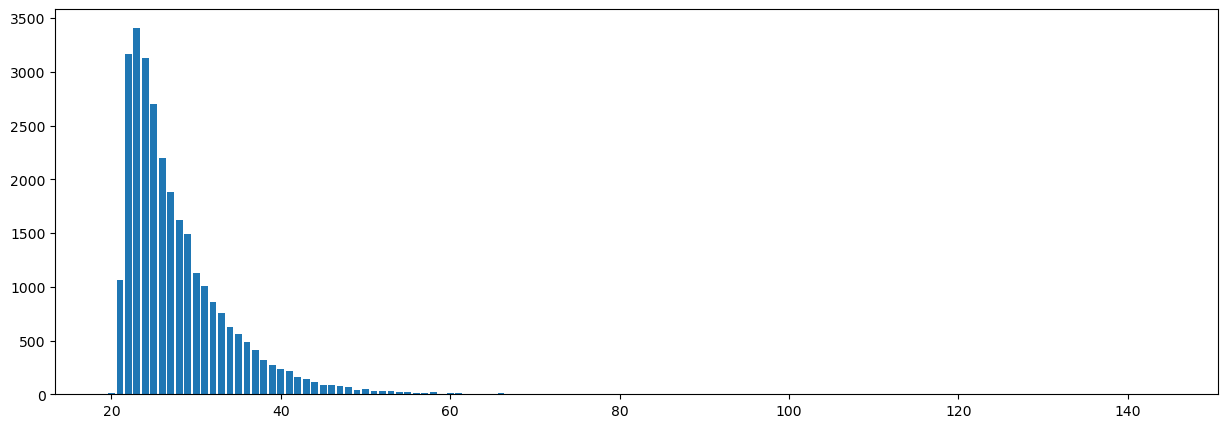

In [11]:
import matplotlib.pyplot as plt 
verti = data['person_age'].value_counts().values
hori = data['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)
# after 80 it is rare

In [12]:
(data['person_age'].value_counts().values>90).sum()
# dropping rows that have age greater than 90

25

In [13]:
max_ = data['person_age'].max()
min_ = data['person_age'].min()
print(f"maximum {max_}")
print(f"minimum {min_}")

maximum 144
minimum 20


In [14]:
data = data.drop(data[data['person_age'] > 80].index, axis=0)
#dropping age above 80

# Improving Diamentionality


## grouping age

In [15]:
# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_age'].between(next,arr[i+1]).sum()
        print(f'There are {num_people} people with an age between {next} and {arr[i+1]}.')
        
age_group([0 ,18, 26, 36, 46, 56, 66])

print(data.shape[0])   


There are 0 people with an age between 1 and 18.
There are 15682 people with an age between 19 and 26.
There are 10422 people with an age between 27 and 36.
There are 2054 people with an age between 37 and 46.
There are 372 people with an age between 47 and 56.
There are 87 people with an age between 57 and 66.
28633


In [16]:
data['age_group'] = pd.cut(data['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65'])

In [17]:
data['age_group'].dtype

CategoricalDtype(categories=['20-25', '26-35', '36-45', '46-55', '56-65'], ordered=True)

In [18]:
data.head()

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20-25
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25


In [19]:
data.shape

(28633, 14)

## Grouping Income

In [20]:
max_ = data['person_income'].max()
min_ = data['person_income'].min()

print(f"maximum {max_}")
print(f"minimum {min_}")

maximum 2039784
minimum 4000


In [21]:
# people with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_income'].between(next,arr[i+1]).sum()
        print(f'There are {num_people} people with an income between {next} and {arr[i+1]}.')
        
income_group([0, 25000, 50000, 75000, 100000,float('inf')])

print(data.shape[0]) 


There are 1972 people with an income between 1 and 25000.
There are 10198 people with an income between 25001 and 50000.
There are 8532 people with an income between 50001 and 75000.
There are 4197 people with an income between 75001 and 100000.
There are 3734 people with an income between 100001 and inf.
28633


In [22]:
data['income_group'] = pd.cut(data['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [23]:
data['income_group']

0             middle
1                low
2                low
3             middle
4             middle
            ...     
28633         middle
28634           high
28635    high-middle
28636           high
28637     low-middle
Name: income_group, Length: 28633, dtype: category
Categories (5, object): ['low' < 'low-middle' < 'middle' < 'high-middle' < 'high']

## Grouping Loan Amount

In [24]:
max_loan_amount = data['loan_amnt'].max()
min_loan_amount = data['loan_amnt'].min()

print(f"maximum {max_loan_amount}")
print(f"minimum {min_loan_amount}")

maximum 35000
minimum 500


In [25]:
# people with an income between x and y
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'There are {num_people} people with an loan_amount between {next} and {arr[i+1]}.')
        
loan_amount_group([0, 5000, 10000, 15000, float('inf')])

print(data.shape[0])   

There are 8182 people with an loan_amount between 1 and 5000.
There are 10608 people with an loan_amount between 5001 and 10000.
There are 5430 people with an loan_amount between 10001 and 15000.
There are 4413 people with an loan_amount between 15001 and inf.
28633


In [26]:
data['loan_amount_group'] = pd.cut(data['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [27]:
data['loan_amount_group']

0        very large
1             small
2            medium
3        very large
4        very large
            ...    
28633        medium
28634    very large
28635    very large
28636         large
28637        medium
Name: loan_amount_group, Length: 28633, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

In [28]:
data = data.drop(data[data['person_emp_length'] > 60].index, axis=0)

# Creating Ratios

In [29]:
data = data.drop(['index'], axis=1)
data.reset_index(inplace = True)
data = data.drop(['index'], axis=1)

In [30]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small


In [31]:
data['person_home_ownership'].value_counts()


RENT        14548
MORTGAGE    11797
OWN          2192
OTHER          94
Name: person_home_ownership, dtype: int64

In [32]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small


# 

In [33]:
# Create loan-to-income ratio
data['loan_to_income_ratio'] = data['loan_amnt'] / data['person_income']

# Create loan-to-employment length ratio
data['loan_to_emp_length_ratio'] =  data['person_emp_length']/ data['loan_amnt'] 

# Create interest rate-to-loan amount ratio
data['int_rate_to_loan_amt_ratio'] = data['loan_int_rate'] / data['loan_amnt']

In [34]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [35]:
raw_data = data

# Feature Engineering

In [36]:
col_list = ['person_age',#
 'person_income',#
 'person_home_ownership',#
 'person_emp_length',#
 'loan_intent', #
 'loan_grade',#
 'loan_amnt',#
 'loan_int_rate',#
 'loan_status',#
 'loan_percent_income',#
 'cb_person_default_on_file',#
 'cb_person_cred_hist_length',
'age_group','income_group','loan_amount_group']

drop_colums = ['cb_person_cred_hist_length','cb_person_default_on_file','loan_grade']
scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','loan_percent_income','loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']
ohe_colums = [ 'person_home_ownership','loan_intent','income_group','age_group','loan_amount_group']
le_colums = []

In [37]:
data = data.drop(drop_colums, axis=1)

In [38]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'age_group', 'income_group',
       'loan_amount_group', 'loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [39]:
X = data.drop(['loan_status'], axis=1)
Y = data['loan_status']

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=12)


In [41]:
print(x_train.shape,x_test.shape)

(22904, 14) (5727, 14)


In [42]:
x_train.reset_index(inplace = True)
x_test.reset_index(inplace = True)
# y_test = y_test.reset_index()
# y_train = y_train.reset_index()
# y_train.drop(['index'], axis=1,inplace=True)
# y_test.drop(['index'], axis=1,inplace=True)

In [43]:
x_train.columns

Index(['index', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'age_group', 'income_group', 'loan_amount_group',
       'loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [44]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(x_train[ohe_colums])

OneHotEncoder()

In [45]:
ohe.categories_

[array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['high', 'high-middle', 'low', 'low-middle', 'middle'], dtype=object),
 array(['20-25', '26-35', '36-45', '46-55', '56-65', nan], dtype=object),
 array(['large', 'medium', 'small', 'very large'], dtype=object)]

In [46]:
merge_ohe_col = np.concatenate((ohe.categories_[0], 
                ohe.categories_[1],
                ohe.categories_[2],
                ohe.categories_[3],
                ohe.categories_[4],
                ))

In [47]:
merge_ohe_col

array(['MORTGAGE', 'OTHER', 'OWN', 'RENT', 'DEBTCONSOLIDATION',
       'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE',
       'high', 'high-middle', 'low', 'low-middle', 'middle', '20-25',
       '26-35', '36-45', '46-55', '56-65', nan, 'large', 'medium',
       'small', 'very large'], dtype=object)

In [48]:
ohe_data = pd.DataFrame(ohe.transform(x_train[ohe_colums]).toarray(), columns=merge_ohe_col)
ohe_data2 = pd.DataFrame(ohe.transform(x_test[ohe_colums]).toarray(),columns=merge_ohe_col)

In [49]:

X_new = pd.concat([ohe_data, x_train], axis=1)
X_new = X_new.drop(ohe_colums, axis=1)


X_new_test = pd.concat([ohe_data2, x_test], axis=1)
X_new_test = X_new_test.drop(ohe_colums, axis=1)


In [50]:
X_new.head()
X_new.shape

(22904, 35)

In [51]:
X_new_test.head()


,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,...,index,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,20936,35,66000,4.0,3000,6.03,0.05,0.045455,0.001333,0.002010
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,20634,35,33144,3.0,8400,14.91,0.25,0.253440,0.000357,0.001775
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,19037,32,36000,4.0,6000,16.07,0.17,0.166667,0.000667,0.002678
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,871,25,61500,1.0,18000,13.23,0.29,0.292683,0.000056,0.000735
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,16988,32,24000,7.0,2800,10.99,0.12,0.116667,0.002500,0.003925


In [52]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler




normal_col = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','loan_percent_income','loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']


scaler_uniform = MinMaxScaler()
#X_new.loc[:,uniform_col] = scaler_uniform.fit_transform(X_new.loc[:,uniform_col])
#X_new_test.loc[:,uniform_col] = scaler_uniform.transform(X_new_test.loc[:,uniform_col])

scaler_normal = StandardScaler()
X_new.loc[:,scale_cols] = scaler_normal.fit_transform(X_new.loc[:,scale_cols])
X_new_test.loc[:,scale_cols] = scaler_normal.transform(X_new_test.loc[:,scale_cols])

scaler_bimodal = RobustScaler()
#X_new.loc[:,bimodal_col] = scaler_bimodal.fit_transform(X_new.loc[:,bimodal_col])
#X_new_test.loc[:,bimodal_col] = scaler_bimodal.transform(X_new_test.loc[:,bimodal_col])

In [53]:
X_new_test.head()

,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,...,index,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,20936,1.181707,-0.006231,-0.192831,-1.052710,-1.556377,-1.123388,-1.166312,0.530868,0.076675
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,20634,1.181707,-0.655354,-0.440648,-0.197407,1.195223,0.757473,0.783954,-0.380924,-0.049526
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,19037,0.695186,-0.598929,-0.192831,-0.577541,1.554667,0.005128,-0.029712,-0.091820,0.435586
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,871,-0.440030,-0.095136,-0.936282,1.323133,0.674650,1.133645,1.151937,-0.662616,-0.608033
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,16988,0.695186,-0.836009,0.550621,-1.084388,-0.019447,-0.465087,-0.498559,1.620571,1.105078


In [54]:
X_new.head()

,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,...,index,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,8981,-0.764378,-0.006231,0.054986,-0.577541,-1.373556,-0.747216,-0.740087,0.063852,-0.410228
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,27638,2.641271,0.566710,-0.192831,0.056017,-0.031842,-0.559130,-0.605490,-0.340895,-0.414703
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2128,-0.440030,-0.677877,-0.440648,2.075483,-1.512996,5.083453,5.073058,-0.591338,-0.857100
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,25179,1.019534,0.467927,3.524426,-0.735931,0.792399,-1.029345,-1.071595,2.834811,0.459036
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5763,-0.764378,-0.322337,0.302803,-0.419152,-1.568771,-0.277001,-0.279764,0.086091,-0.543206


In [55]:
X_new.drop(['index'], axis=1,inplace=True)
X_new_test.drop(['index'], axis=1,inplace=True)

In [56]:
X_new.head()


,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,...,very large,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,-0.764378,-0.006231,0.054986,-0.577541,-1.373556,-0.747216,-0.740087,0.063852,-0.410228
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.641271,0.566710,-0.192831,0.056017,-0.031842,-0.559130,-0.605490,-0.340895,-0.414703
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,-0.440030,-0.677877,-0.440648,2.075483,-1.512996,5.083453,5.073058,-0.591338,-0.857100
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.019534,0.467927,3.524426,-0.735931,0.792399,-1.029345,-1.071595,2.834811,0.459036
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,-0.764378,-0.322337,0.302803,-0.419152,-1.568771,-0.277001,-0.279764,0.086091,-0.543206


In [57]:
X_new.head()

,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,...,very large,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,-0.764378,-0.006231,0.054986,-0.577541,-1.373556,-0.747216,-0.740087,0.063852,-0.410228
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.641271,0.566710,-0.192831,0.056017,-0.031842,-0.559130,-0.605490,-0.340895,-0.414703
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,-0.440030,-0.677877,-0.440648,2.075483,-1.512996,5.083453,5.073058,-0.591338,-0.857100
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.019534,0.467927,3.524426,-0.735931,0.792399,-1.029345,-1.071595,2.834811,0.459036
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,-0.764378,-0.322337,0.302803,-0.419152,-1.568771,-0.277001,-0.279764,0.086091,-0.543206


# Modeling

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as LGBMClassifier

In [59]:
svc = SVC()
knc = KNeighborsClassifier() #algorithm='ball_tree', leaf_size=10, n_neighbors=18, p=1, weights='distance'
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier(depth=7, iterations=300, l2_leaf_reg= 1, learning_rate= 0.1,verbose=0) #
# lgb = LGBMClassifier(colsample_bytree= 0.7378703019867917,learning_rate= 0.007929963347654646,max_depth=5,min_child_weight= 0.05345076003503776,num_leaves= 20,subsample= 0.892939141154265) 

#best #colsample_bytree= 0.7378703019867917,learning_rate= 0.007929963347654646,max_depth=5,min_child_weight= 0.05345076003503776,num_leaves= 20,subsample= 0.892939141154265
#colsample_bytree= 1.0,learning_rate= 0.1,max_depth=11,min_child_weight= 1e-05,num_leaves= 1024,subsample=1.0

In [60]:
# clfs = {
#     'KN' : knc, 
#     'xgb':xgb,
#     'cat':cat,
#     # 'lgb':lgb
# }

In [61]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb,
    'cat':cat
}

In [62]:
from sklearn.metrics import precision_score,accuracy_score
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [63]:
X_new = X_new.drop(columns=[col for col in X_new.columns if pd.isna(col)], axis=1)
X_new_test = X_new_test.drop(columns=[col for col in X_new_test.columns if pd.isna(col)], axis=1)


In [64]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_new,y_train,X_new_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8978522786799371
Precision -  0.9144654088050315
For  KN
Accuracy -  0.8695652173913043
Precision -  0.7853042479908151
For  DT
Accuracy -  0.891042430591933
Precision -  0.7487961476725522
For  LR
Accuracy -  0.85664396717304
Precision -  0.7502958579881657


/Users/ekamsinghahuja/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For  RF
Accuracy -  0.9198533263488737
Precision -  0.9405162738496072
For  AdaBoost
Accuracy -  0.8837087480356207
Precision -  0.8029350104821803
For  BgC
Accuracy -  0.9231709446481579
Precision -  0.9341252699784017
For  ETC
Accuracy -  0.9036144578313253
Precision -  0.8977011494252873
For  GBDT
Accuracy -  0.9165357080495896
Precision -  0.9402298850574713
For  xgb
Accuracy -  0.9324253535882661
Precision -  0.9505783385909569
For  cat
Accuracy -  0.9320761306093941
Precision -  0.9651795429815017


In [65]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier



knn = KNeighborsClassifier()
#xgb = XGBClassifier()
cat = CatBoostClassifier(verbose=0)
rf = RandomForestClassifier()


ensemble = VotingClassifier(estimators=[('knn', knn),  ('cat', cat), ('rf', rf)], voting='soft',verbose=0)
ensemble_accuracy, ensemble_precision = train_classifier(ensemble, X_new, y_train, X_new_test, y_test)

print("For ensemble")
print("Accuracy - ", ensemble_accuracy)
print("Precision - ", ensemble_precision)


For ensemble
Accuracy -  0.9217740527326698
Precision -  0.9522727272727273


# data cleaning function for backend


In [66]:
def clean_data(data_point):
    data_point_as_frame = data_point
    
    #grouping data
    data_point_as_frame['age_group'] = pd.cut(data_point_as_frame['person_age'],bins=[20, 26, 36, 46, 56, 66],labels=['20-25', '26-35', '36-45', '46-55', '56-65'])
    data_point_as_frame['income_group'] = pd.cut(data_point_as_frame['person_income'],bins=[0, 25000, 50000, 75000, 100000, float('inf')],labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])
    data_point_as_frame['loan_amount_group'] = pd.cut(data_point_as_frame['loan_amnt'],bins=[0, 5000, 10000, 15000, float('inf')],labels=['small', 'medium', 'large', 'very large'])
    
    #ratios
    # Create loan-to-income ratio
    data_point_as_frame['loan_to_income_ratio'] = data_point_as_frame['loan_amnt'] / data_point_as_frame['person_income']

    # Create loan-to-employment length ratio
    data_point_as_frame['loan_to_emp_length_ratio'] =  data_point_as_frame['person_emp_length']/ data_point_as_frame['loan_amnt'] 

    # Create interest rate-to-loan amount ratio
    data_point_as_frame['int_rate_to_loan_amt_ratio'] = data_point_as_frame['loan_int_rate'] / data_point_as_frame['loan_amnt']
    
    drop_colums = ['cb_person_cred_hist_length','cb_person_default_on_file','loan_grade']
    scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','loan_percent_income','loan_to_income_ratio', 'loan_to_emp_length_ratio',
        'int_rate_to_loan_amt_ratio']
    ohe_colums = [ 'person_home_ownership','loan_intent','income_group','age_group','loan_amount_group',]
    
    
    col_list = ['person_age',#
    'person_income',#
    'person_home_ownership',#
    'person_emp_length',#
    'loan_intent', #
    'loan_grade',#
    'loan_amnt',#
    'loan_int_rate',#
    'loan_status',#
    'loan_percent_income',#
    'cb_person_default_on_file',#
    'cb_person_cred_hist_length',
    'age_group','income_group','loan_amount_group']
    
    # merge_ohe_col = np.concatenate((ohe.categories_[0], 
    #             ohe.categories_[1],
    #             ohe.categories_[2],
    #             ohe.categories_[3],
    #             ohe.categories_[4],
    #             ohe.categories_[5],
    #             ohe.categories_[6]))
    
    #drop
    # data_point_as_frame = data_point_as_frame.drop(drop_colums, axis=1)
    
    
    #one hot
    ohe_data = pd.DataFrame(ohe.transform(data_point_as_frame[ohe_colums]).toarray(), columns=merge_ohe_col)
    
    
    data_point_as_frame_new = pd.concat([ohe_data, data_point_as_frame], axis=1)
    data_point_as_frame_new = data_point_as_frame_new.drop(ohe_colums, axis=1)
    data_point_as_frame_new[scale_cols] = scaler_normal.transform(data_point_as_frame_new[scale_cols])
    
    data_point_as_frame_new.columns = data_point_as_frame_new.columns.astype(str)
    data_point_as_frame_new = data_point_as_frame_new.drop(['nan'], axis=1)
    return data_point_as_frame_new


In [67]:
point = pd.DataFrame(np.array(data_original.iloc[1]).reshape(1,-1),columns=data_original.columns)

In [68]:
data_original=data_original.dropna()


In [69]:
data_original = data_original.drop(drop_colums, axis=1)


In [70]:
import pickle
with open('model_creditease.pkl', 'wb') as file:
    pickle.dump(ensemble, file)
with open('scl.pkl', 'wb') as file:
    pickle.dump(scaler_normal, file)
with open('ohe.pkl', 'wb') as file:
    pickle.dump(ohe, file)
with open('da.pkl', 'wb') as file:
    pickle.dump(data_original, file)

In [71]:
data_original2 = data_original.drop(['loan_status'],axis=1)

In [72]:
data_original2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_percent_income
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,0.59
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0.10
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,0.57
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,0.53
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,0.55
...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0.11
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0.15
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,0.46
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0.10


In [73]:
data_original2=clean_data(data_original2)

In [ ]:
data_original2.shape

In [ ]:
a.shape

In [ ]:
a.columns

In [ ]:
data_original2.columns

In [ ]:
data_original['person_home_ownership'].value_counts()

In [78]:
data_original['loan_intent']

0               PERSONAL
1              EDUCATION
2                MEDICAL
3                MEDICAL
4                MEDICAL
              ...       
32576           PERSONAL
32577           PERSONAL
32578    HOMEIMPROVEMENT
32579           PERSONAL
32580            MEDICAL
Name: loan_intent, Length: 28638, dtype: object

In [80]:
data_original['loan_intent'].value_counts().index

Index(['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'DEBTCONSOLIDATION',
       'HOMEIMPROVEMENT'],
      dtype='object')

In [86]:
data_original['loan_int_rate'].value_counts().index

Float64Index([10.99,  7.51,  7.49,  7.88,   7.9,  5.42, 11.49, 13.49,  9.99,
               6.03,
              ...
              21.14, 17.46, 21.64, 18.36, 19.39, 18.17, 22.06,  20.2, 17.44,
              20.53],
             dtype='float64', length=348)

<BarContainer object of 348 artists>

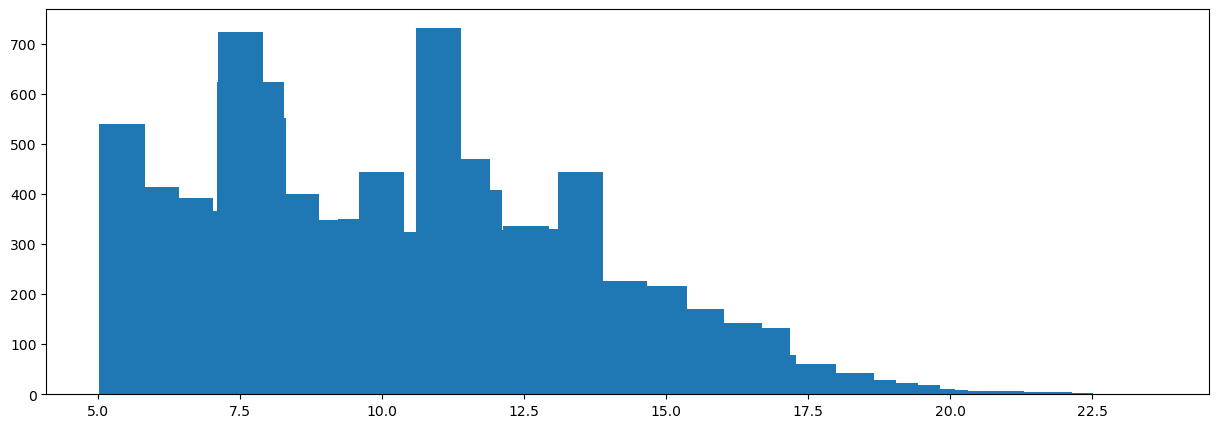

In [87]:
import matplotlib.pyplot as plt 
verti = data['loan_int_rate'].value_counts().values
hori = data['loan_int_rate'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)

In [ ]:
li = [5,6,7,8,10,11,12,13,14,15,16,17,20]